In [4]:
from keras.applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.models import Model
from keras.engine.topology import get_source_inputs
from keras.utils import plot_model
from keras.layers import Input, Convolution2D, \
    GlobalAveragePooling2D, Dense, BatchNormalization, Activation
#from .functional_model.depthwise_conv2d import DepthwiseConvolution2D
from functional_module.depthwise_conv2d import DepthwiseConvolution2D



def MobileNet(input_tensor=None, input_shape=(224, 224, 3),
              alpha=1, shallow=False, classes=1000):
    
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=96,
                                      data_format=K.image_data_format(),
                                      require_flatten=True)
    
    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
      
    # block #1      
    x = Convolution2D(int(32 * alpha), (3, 3), strides=(2, 2), padding='same', 
                      use_bias=False)(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    
    # block #2
    x = DepthwiseConvolution2D(int(32 * alpha), (3, 3), strides=(1, 1), padding='same',
                               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(64 * alpha), (1, 1), strides=(1, 1), padding='same',
                      use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    
    # block #3
    x = DepthwiseConvolution2D(int(64 * alpha), (3, 3), strides=(2, 2), padding='same',
                               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(128 * alpha), (1, 1), strides=(1, 1), padding='same',
                      use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    
    # block #4
    x = DepthwiseConvolution2D(int(128 * alpha), (3, 3), strides=(1, 1), padding='same',
                               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(128 * alpha), (1, 1), strides=(1, 1), padding='same', 
                      use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    
    # block #5
    x = DepthwiseConvolution2D(int(128 * alpha), (3, 3), strides=(2, 2), padding='same',
                               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(256 * alpha), (1, 1), strides=(1, 1), padding='same',
                      use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    
    # block #6
    x = DepthwiseConvolution2D(int(256 * alpha), (3, 3), strides=(1, 1), padding='same',
                               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(256 * alpha), (1, 1), strides=(1, 1), padding='same',
                      use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    
    # block #7
    x = DepthwiseConvolution2D(int(256 * alpha), (3, 3), strides=(2, 2), padding='same',
                               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(512 * alpha), (1, 1), strides=(1, 1), padding='same',
                      use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    
    # block is shallow
    if not shallow:
        for _ in range(5):
            x = DepthwiseConvolution2D(int(512 * alpha), (3, 3), strides=(1, 1),
                                       padding='same', use_bias=False)(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            x = Convolution2D(int(512 * alpha), (1, 1), strides=(1, 1),
                              padding='same', use_bias=False)(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
    
    # block #8
    x = DepthwiseConvolution2D(int(512 * alpha), (3, 3), strides=(2, 2), padding='same',
                               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(1024 * alpha), (1, 1), strides=(1, 1), padding='same', 
                      use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    
    # block #9
    x = DepthwiseConvolution2D(int(1024 * alpha), (3, 3), strides=(1, 1), padding='same',
                               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Convolution2D(int(1024 * alpha), (1, 1), strides=(1, 1), padding='same',
                      use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    
    x = GlobalAveragePooling2D()(x)
    out = Dense(classes, activation='softmax')(x)
    
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
        
    model = Model(inputs, out, name='mobilenet')
    
    return model

# if __name__ == '__main__':
#     m = MobileNet(alpha=0.5)
#     plot_model(m, 'mobileNet_v1_alpha=0.5.png', show_shapes=True)
#     

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 112, 112, 32)      864       
_________________________________________________________________
batch_normalization_82 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
activation_82 (Activation)   (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d_40 (Depthwi (None, 112, 112, 32)      288       
_________________________________________________________________
batch_normalization_83 (Batc (None, 112, 112, 32)      128       
_________________________________________________________________
activation_83 (Activation)   (None, 112, 112, 32)      0         
__________

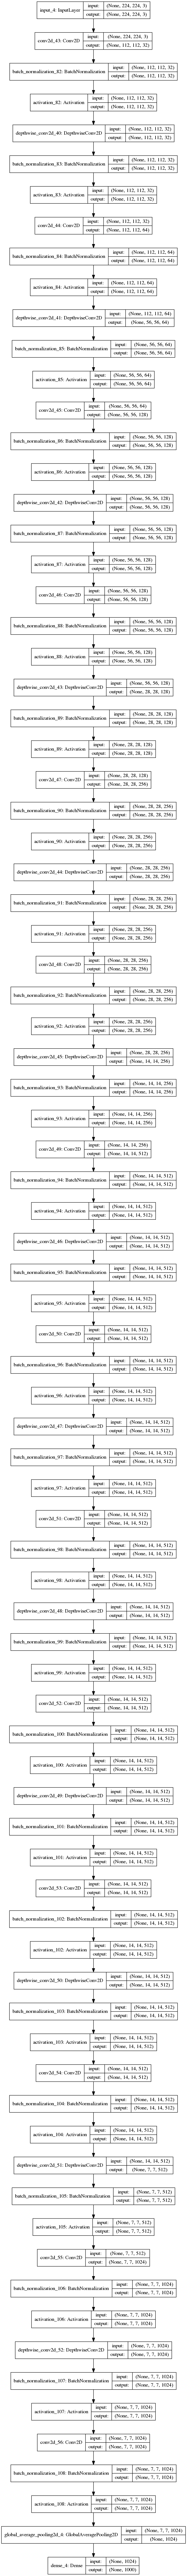

In [8]:
from IPython.display import Image

model = MobileNet()

model.summary()
plot_model(model, to_file='mobileNet_v1.png', show_shapes=True)
Image('mobileNet_v1.png')